In [1]:
#Import statements
import pandas as pd 
import numpy as np
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [20]:
#Creating dataframe
col_names = ['ID', 'Title','tconst','Avg_Rating','Num_Votes','Region','Language','isOriginalTitle','TitleType','isAdult',
                'RuntimeMins','Genre']
data = pd.read_csv("final_data.tsv",header=0, names=col_names, sep='\t', keep_default_na = False)
data.head()

C:\Users\anubh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Title,tconst,Avg_Rating,Num_Votes,Region,Language,isOriginalTitle,TitleType,isAdult,RuntimeMins,Genre
0,1,'...nettirwnU',tt0468250,5.7,20,NA,NA,1,short,0,9,"Drama,Short"
1,2,'...nettirwnU',tt0468250,5.7,20,CA,NA,0,short,0,9,"Drama,Short"
2,3,'11',tt0195506,5.5,16,US,NA,0,movie,1,72,"Adult,Drama"
3,4,'11',tt0195506,5.5,16,NA,NA,1,movie,1,72,"Adult,Drama"
4,5,'15',tt0313150,6.4,183,SG,NA,0,short,0,25,"Comedy,Drama,Short"


In [21]:
#Adding our own attribute
data['Opinion'] = ['Hit' if x >= 5.0 else 'Flop' for x in data['Avg_Rating']]

In [22]:
#Making copies of the data frame
data_copy = data
original_data = data

In [23]:
#Modifying Title type attribute
data_copy.TitleType = data_copy.TitleType.replace(to_replace='movie', value=0)
data_copy.TitleType = data_copy.TitleType.replace(to_replace='short', value=1)
data_copy.TitleType.value_counts()

0    849736
1    132901
Name: TitleType, dtype: int64

In [24]:
#Checking content of RuntimeMins for missing values and modifying RuntimeMins
data_copy.RuntimeMins.value_counts()
data_copy.RuntimeMins = data_copy.RuntimeMins.replace(to_replace = 'NA', value=0)
data_copy.RuntimeMins = data_copy.RuntimeMins.replace(to_replace = r'\N', value = 0)
data_copy.RuntimeMins.value_counts()
data_copy.RuntimeMins = data_copy.RuntimeMins.astype(int)
data_copy.RuntimeMins = data_copy.RuntimeMins.replace(to_replace=0, value=data.RuntimeMins.mean())

In [25]:
#Feature selection : Dropping id,tconst, title, genre and region attributes
data_copy = data_copy.drop(['ID'], axis = 1)
data_copy = data_copy.drop(['Title'], axis = 1)
data_copy = data_copy.drop(['tconst'], axis = 1)
data_copy = data_copy.drop(['Genre'], axis = 1)
data_copy = data_copy.drop(['Region'],axis = 1)
data_copy = data_copy.drop(['isOriginalTitle'], axis =1) 

In [26]:
#Converting non-numerical attributes to numerical attributes using label encoder
data_copy.dtypes
labelEncoder = LabelEncoder()
labelEncoder.fit(data_copy['Language'])
data_copy['Language'] = labelEncoder.transform(data_copy['Language'])
labelEncoder.fit(data_copy['Opinion'])
data_copy['Opinion'] = labelEncoder.transform(data_copy['Opinion'])

In [27]:
#Converting the data frame to an array
data_array = np.array(data_copy)

In [28]:
original_data.dtypes

ID                   int64
Title               object
tconst              object
Avg_Rating         float64
Num_Votes            int64
Region              object
Language            object
isOriginalTitle     object
TitleType            int64
isAdult              int64
RuntimeMins        float64
Genre               object
Opinion             object
dtype: object

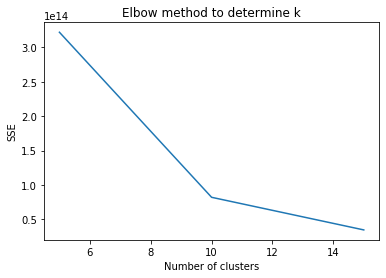

In [29]:
#Determining the optimal number of clusters(value of k)by elbow method
sse = {}
for k in range(5, 20,5):
    kmeans = KMeans(n_clusters=k).fit(data_array)
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow method to determine k")
plt.show()

In [30]:
#Initializing kmeans
kmeans = KMeans(n_clusters=10, max_iter=100)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
#Implementing kmeans on the data
kmeans.fit(data_array)
cluster_labels = kmeans.labels_

In [32]:
#Convert array to two dimensional indexed structure
final_clusters = pd.DataFrame(cluster_labels)

In [33]:
original_data['cluster'] = final_clusters

In [34]:
original_data.dtypes

ID                   int64
Title               object
tconst              object
Avg_Rating         float64
Num_Votes            int64
Region              object
Language            object
isOriginalTitle     object
TitleType            int64
isAdult              int64
RuntimeMins        float64
Genre               object
Opinion             object
cluster              int32
dtype: object

In [35]:
#Evaluating clusters 
print('Davies Bouldin Score: ')
print(davies_bouldin_score(data_array,cluster_labels))
print('Calinski Harabasz Score: ')
print(calinski_harabasz_score(data_array, cluster_labels))

Davies Bouldin Score: 
0.49466607590291234
Calinski Harabasz Score: 
6369411.547411497


In [36]:
#Grouping original data according to clusters formed to understand patterns
results = original_data.groupby('cluster')

In [38]:
#Obtaining value and frequency counts for all regions in cluster 1
results.Region.value_counts()[1]

Region
US      229
GR      190
ES      153
CA      148
FI      130
MX      123
BG      122
NA      121
RO      120
BR      119
PT      119
RS      119
UA      119
AR      118
RU      118
TR      115
FR      114
CZ      113
DE      111
LT      111
PL      111
HU      110
HR      106
IT      106
SI       98
PE       89
EE       85
UY       84
SK       67
JP       63
       ... 
KR        8
XWG       8
SUHH      7
MK        6
TW        6
IN        5
SG        5
NZ        4
ZA        4
BO        3
CR        3
EC        3
IE        3
PY        3
BA        2
CH        2
TH        2
XSA       2
CU        1
DO        1
GT        1
KZ        1
LU        1
MA        1
MY        1
PH        1
PK        1
PR        1
XEU       1
YUCS      1
Name: Region, Length: 86, dtype: int64

In [39]:
#Obtaining value and frequency counts for all average ratings in cluster 1
results.Avg_Rating.value_counts()[1]

Avg_Rating
7.10    179
7.20    153
7.25    143
6.95    140
6.85    138
7.15    137
7.35    133
7.40    130
6.80    127
6.90    125
7.05    121
7.30    120
6.75    118
7.45    118
6.70    116
7.00    116
7.55    111
6.65    110
7.50    108
7.65     99
6.55     97
6.45     92
6.60     92
6.50     85
7.85     76
6.20     71
6.30     71
7.70     71
7.60     68
6.40     67
       ... 
5.35      9
5.30      8
5.40      8
5.05      7
8.30      7
5.20      6
8.40      6
4.95      5
8.25      5
8.35      5
4.65      4
4.70      4
4.90      4
8.45      4
4.50      3
4.75      3
4.85      3
8.50      3
8.55      3
4.10      2
4.80      2
5.15      2
8.65      2
8.90      2
3.85      1
8.60      1
8.70      1
8.80      1
8.85      1
9.10      1
Name: Avg_Rating, Length: 89, dtype: int64

In [40]:
#Obtaining value and frequency counts of all genres in cluster 1
results.Genre.value_counts()[1]

Genre
Action,Adventure,Sci-Fi       459
Adventure,Family,Fantasy      320
Adventure,Animation,Comedy    207
Crime,Drama,Mystery           185
Action,Adventure,Comedy       141
Drama                         109
Comedy                        104
Crime,Drama                   104
Comedy,Drama,Romance          100
Mystery,Thriller              100
Crime,Drama,Thriller           96
Comedy,Drama                   91
Drama,Mystery,Sci-Fi           85
Action,Adventure,Drama         76
Action,Drama,Mystery           75
Action,Adventure,Fantasy       70
Action,Drama,War               70
Action,Adventure,Animation     69
Comedy,Crime                   68
Action,Mystery,Thriller        67
Action,Biography,Drama         66
Drama,Sci-Fi,Thriller          65
Action,Adventure               59
Adventure,Fantasy              55
Drama,Family,Fantasy           53
Adventure,Comedy,Sci-Fi        51
Drama,Mystery                  50
Action,Thriller                49
Action,Sci-Fi                  43
Drama,Fa